<a href="https://colab.research.google.com/github/afrilazahraaa/Datamining/blob/main/PIZZA_SALES_DATASET_CHECKPOINT4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PIZZA SALES DATASET

#**Import Library**

In [ ]:
import seaborn as sns
import  matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import display

In [ ]:
import os
import json

##**Business Understanding**

**Business Objective**

Tujuan bisnis dari dataset ini adalah Menganalisis data penjualan pizza untuk meningkatkan penjualan dan keuntungan. Mengidentifikasi menu dan promosi yang paling efektif untuk meningkatkan penjualan. Memahami perilaku konsumen dan faktor-faktor yang mempengaruhi pembelian pizza.


**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah Perusahaan memiliki dataset penjualan pizza selama 2 tahun terakhir. Data berisi detail pemesanan seperti menu yang dipesan, waktu pemesanan, lokasi, demografi pelanggan, dan sebagainya. Penjualan pizza menunjukkan penurunan dalam beberapa bulan terakhir. Perusahaan ingin memahami faktor-faktor yang mempengaruhi penjualan pizza.


**Data Mining Goals**

Tujuan data mining pada dataset ini adalah untuk Melakukan segmentasi pelanggan berdasarkan pola pembelian dan demografi. Mengidentifikasi menu dan promosi paling laris di setiap segmen pelanggan. Membangun model prediksi untuk meramalkan penjualan di masa depan. Menemukan insight tentang perilaku dan preferensi pelanggan pizza.


**Project Plan**

Rencana Proyek untuk menganalisis dataset ini dimulai dengan Melakukan persiapan data, cleaning, transformasi (2 minggu). Analisis deskriptif untuk memahami data (1 minggu). Segmentasi pelanggan dan analisis menu laris (2 minggu). Membangun model prediksi penjualan pizza (3 minggu). Memberikan rekomendasi menu dan promosi untuk meningkatkan penjualan (2 minggu).

#**DATA UNDERSTANDING**

##**Collect Initial Data**

data tentang Pizza Sales Dataset ini diperoleh melalui kaggle, berikut ini linknya :
 https://www.kaggle.com/datasets/nextmillionaire/pizza-sales-dataset?resource=download

In [ ]:
df = pd.read_csv('pizza_sales.csv')
print(df)

       pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0           1.0       1.0     hawaiian_m       1.0    1/1/2015   11:38:36   
1           2.0       2.0  classic_dlx_m       1.0    1/1/2015   11:57:40   
2           3.0       2.0  five_cheese_l       1.0    1/1/2015   11:57:40   
3           4.0       2.0    ital_supr_l       1.0    1/1/2015   11:57:40   
4           5.0       2.0     mexicana_m       1.0    1/1/2015   11:57:40   
...         ...       ...            ...       ...         ...        ...   
48615   48616.0   21348.0  ckn_alfredo_m       1.0  31-12-2015   21:23:10   
48616   48617.0   21348.0  four_cheese_l       1.0  31-12-2015   21:23:10   
48617   48618.0   21348.0   napolitana_s       1.0  31-12-2015   21:23:10   
48618   48619.0   21349.0     mexicana_l       1.0  31-12-2015   22:09:54   
48619   48620.0   21350.0      bbq_ckn_s       1.0  31-12-2015   23:02:05   

       unit_price  total_price pizza_size pizza_category  \
0           13.

In [ ]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


df.head berfungsi untuk menampilkan 5 baris data pertama

In [ ]:
pizza_sales_counts = df['pizza_category'].value_counts()
print(pizza_sales_counts)

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64


##**Describe Data**

####Informasi Dasar

In [ ]:
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 48620
Jumlah Kolom: 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


pada data diatas dapat diketahui bahwa
jumlah baris yang terdapat pada data adalah 48620 dan jumlah kolom 12. perbedaan pada kedua kode diatas adalah saat menggunakan print maka hanya akan menampilkan jumlah baris dan kolom yang dimiliki, tanpa menampilkan nama kolom yang ada. Sedangkan saat menggunakan df.info() nama-nama kolom yang dimiliki pada dataset akan ditampilkan beserta dengan tipe data

####Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB




1.   **pizza_id**: Merupakan identifikasi unik untuk setiap jenis pizza. Terdapat 48620 data pizza dalam dataset ini dengan tipe data integer (int64), yang digunakan untuk mengidentifikasi setiap jenis pizza.
2.   **order_id**: Merupakan identifikasi unik untuk setiap pesanan. Terdapat 48620 data pesanan dalam dataset ini dengan tipe data integer (int64), yang digunakan untuk mengidentifikasi setiap pesanan.
3. **pizza_name_id**: Merupakan identifikasi unik untuk setiap nama pizza. Tipe data kolom ini adalah objek (string), yang digunakan untuk mengidentifikasi setiap nama pizza.
4. **quantity**: Merupakan jumlah pizza yang dipesan dalam setiap pesanan. Data ini direpresentasikan dalam bentuk integer (int64) karena berupa nilai angka.
5. **order_date**: Tanggal pesanan pizza dilakukan. Tipe data kolom ini adalah objek (string) karena berisi format tanggal.
6. **order_time**: Waktu pesanan pizza dilakukan. Tipe data kolom ini juga objek (string) karena berisi format waktu.
7. **unit_price**: Harga per unit pizza. Data pada kolom ini berupa nilai numerik (float64) karena berisi harga pizza dalam bentuk angka.
8. **total_price**: Total harga dari setiap pesanan pizza. Tipe data kolom ini adalah float64 karena berisi nilai numerik untuk total harga.
9. **pizza_size**: Ukuran pizza yang dipesan, seperti S (Small), M (Medium), atau L (Large). Data pada kolom ini berupa nilai kategoris dan memiliki tipe data objek (string).
10. **pizza_category**: Kategori pizza yang dipesan, misalnya Classic, Veggie, atau Chicken. Data pada kolom ini juga berupa nilai kategoris dan memiliki tipe data objek (string).
11. **pizza_ingredients**: Daftar bahan-bahan yang digunakan dalam pembuatan pizza. Tipe data kolom ini adalah objek (string) dan memiliki 48620 data.
12. **pizza_name**: Nama lengkap dari setiap jenis pizza. Tipe data kolom ini adalah objek (string) dan memiliki 48620 data.


Setiap kolom memiliki 48620 data yang tidak kosong (non-null). Tipe data dalam dataset ini meliputi float64 untuk data numerik dan objek (string) untuk data non-numerik. Total penggunaan memori dataset ini adalah sekitar 4.5+ MB.

####Informasi Statistik Deskriptif

In [ ]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


Pada ringkasan statistik di atas, terdapat 5 kolom, yaitu pizza_id, order_id, quantity, unit_price, dan total_price, yang memiliki baris.

Baris pertama menunjukkan "count", yang merupakan jumlah total baris dalam dataset, yaitu 48620 data.

Selanjutnya, terdapat nilai "mean", yang merupakan nilai rata-rata dari masing-masing kolom. Untuk pizza_id, nilai rata-ratanya adalah 24310.5. Untuk order_id, nilai rata-ratanya adalah 10701.48. Untuk quantity, nilai rata-ratanya adalah 1.0196. Untuk unit_price, nilai rata-ratanya adalah 16.4941. Dan untuk total_price, nilai rata-ratanya adalah 16.8215.

Kemudian, terdapat nilai "std", yang merupakan standar deviasi dari masing-masing kolom. Standar deviasi digunakan untuk mengukur seberapa tersebarnya data dari nilai rata-rata.

Selanjutnya, terdapat nilai "min", yang merupakan nilai terkecil dalam setiap kolom. Nilai terkecil untuk pizza_id, order_id, quantity, unit_price, dan total_price adalah berturut-turut 1.0, 1.0, 1.0, 9.75, dan 9.75.

Kuartil, yang terdiri dari 25%, 50%, dan 75%, menyajikan nilai yang membagi data menjadi empat bagian sebanding. Kuartil pertama (25%) untuk pizza_id adalah 12155.75, untuk order_id adalah 5337.0, untuk quantity adalah 1.0, untuk unit_price adalah 12.75, dan untuk total_price adalah 12.75. Kuartil kedua (50%) untuk pizza_id adalah 24310.5, untuk order_id adalah 10682.5, untuk quantity adalah 1.0, untuk unit_price adalah 16.5, dan untuk total_price adalah 16.5. Kuartil ketiga (75%) untuk pizza_id adalah 36465.25, untuk order_id adalah 16100.0, untuk quantity adalah 1.0, untuk unit_price adalah 20.25, dan untuk total_price adalah 20.5.

Nilai "max" menunjukkan nilai tertinggi yang terdapat pada setiap kolom. Nilai tertinggi untuk pizza_id, order_id, quantity, unit_price, dan total_price adalah berturut-turut 48620.0, 21350.0, 4.0, 35.95, dan 83.0.

##**Exploratory Data Analysis**

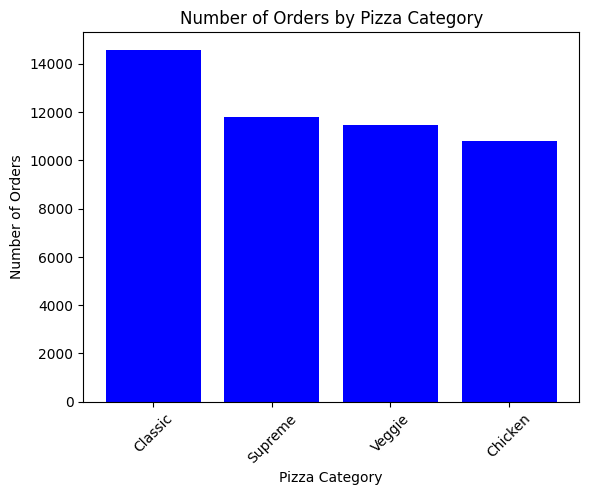

In [ ]:
pizza_category_counts = df['pizza_category'].value_counts()
plt.bar(pizza_category_counts.index, pizza_category_counts.values, color='blue')
plt.xlabel('Pizza Category')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Pizza Category')
plt.xticks(rotation=45)
plt.show()

Diagram batang ini menggambarkan jumlah pesanan pizza berdasarkan kategori pizza. pada diagram ini terlihat sangat jelas bahwa kategori pizza classic lebih banyak diminati.

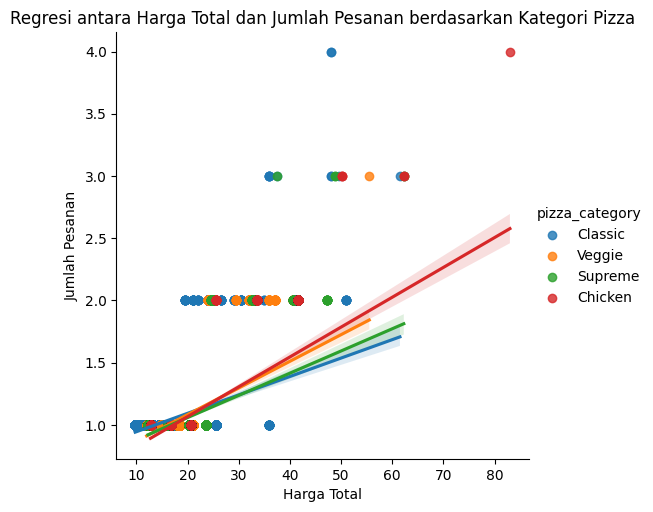

In [ ]:
sns.lmplot(x="total_price",
           y="quantity",
           hue="pizza_category",
           data=df)
plt.xlabel('Harga Total')
plt.ylabel('Jumlah Pesanan')
plt.title('Regresi antara Harga Total dan Jumlah Pesanan berdasarkan Kategori Pizza')
plt.show()

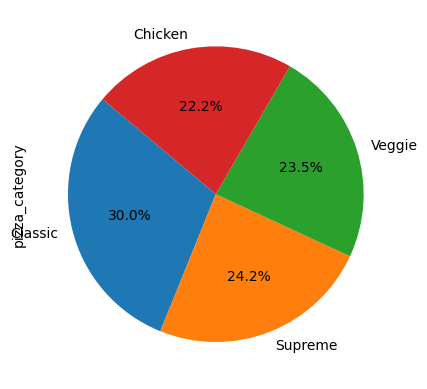

In [ ]:
SubscriptionType_counts = df['pizza_category'].value_counts()
SubscriptionType_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.show()

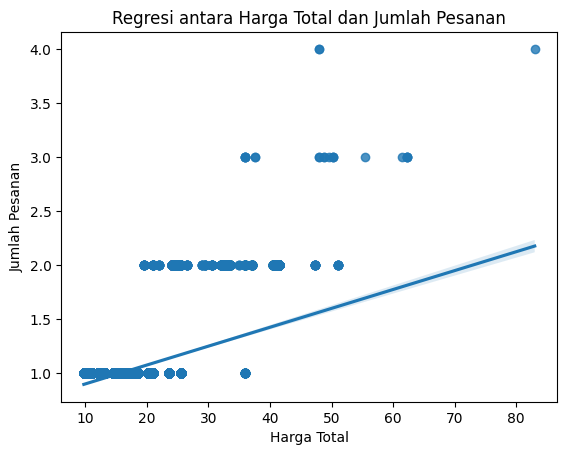

In [ ]:
fig, ax = plt.subplots()
sns.regplot(x="total_price", y="quantity", data=df, ax=ax)
plt.xlabel('Harga Total')
plt.ylabel('Jumlah Pesanan')
plt.title('Regresi antara Harga Total dan Jumlah Pesanan')
plt.show()

<Axes: >

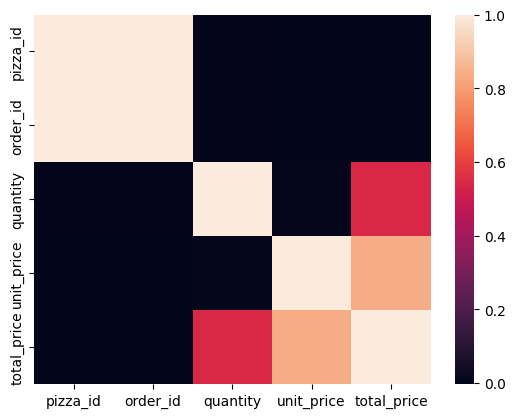

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

##**Verify Data Quality**

####Missing Values

In [ ]:
missing_values = df.isnull().sum()
print("Jumlah nilai kosong untuk setiap kolom:")
print(missing_values)

Jumlah nilai kosong untuk setiap kolom:
pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64


dari hasil diatas dapat disimpulkan bahwa setiap kolom pada dataset memiliki nilai/lengkap(not null), dikarenakan jumlah nilai kosong untuk setiap kolom adalah 0.

In [ ]:
pd.DataFrame(df.isna().sum() /len(df)*100, columns=['NullRatio in %'])

,NullRatio in %
pizza_id,0.0
order_id,0.0
pizza_name_id,0.0
quantity,0.0
order_date,0.0
order_time,0.0
unit_price,0.0
total_price,0.0
pizza_size,0.0
pizza_category,0.0


dari 12 kolom diatas yaitu pizza_id,order_id,pizza_name_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name semua kolom memiliki null ratio 0.0 yang berarti setiap kolom yang terdapat pada dataset tidak ada yang memiliki nilai null.

####Outliers Values

<ipython-input-19-ac7a50a7024e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pizza_category', y='total_price', data=df, palette='pastel')


<Axes: xlabel='pizza_category', ylabel='total_price'>

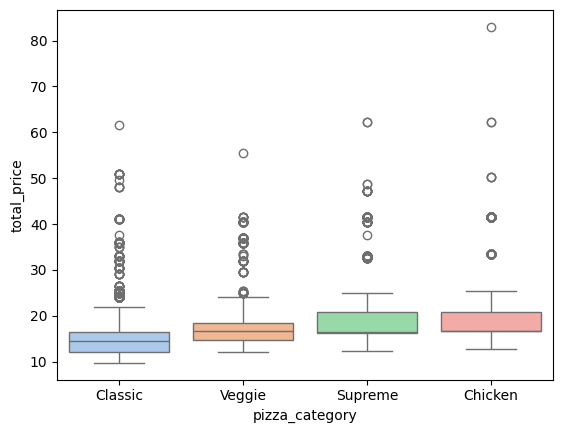

In [ ]:
sns.boxplot(x='pizza_category', y='total_price', data=df, palette='pastel')

In [ ]:
data_sorted = df.sort_values(by='total_price', ascending=False)
print(data_sorted.head())

       pizza_id  order_id pizza_name_id  quantity  order_date order_time  \
35496   35497.0   15674.0    cali_ckn_l       4.0  19-09-2015   14:16:35   
38819   38820.0   17112.0     bbq_ckn_l       3.0  17-10-2015   12:56:31   
37638   37639.0   16619.0  prsc_argla_l       3.0   8/10/2015   12:19:53   
18317   18318.0    8040.0    thai_ckn_l       3.0  15-05-2015   14:13:27   
183       184.0      78.0  spicy_ital_l       3.0    2/1/2015   12:28:14   

       unit_price  total_price pizza_size pizza_category  \
35496       20.75        83.00          L        Chicken   
38819       20.75        62.25          L        Chicken   
37638       20.75        62.25          L        Supreme   
18317       20.75        62.25          L        Chicken   
183         20.75        62.25          L        Supreme   

                                       pizza_ingredients  \
35496  Chicken, Artichoke, Spinach, Garlic, Jalapeno ...   
38819  Barbecued Chicken, Red Peppers, Green Peppers,...   
37

####Duplicated Valuase

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Duplikat di seluruh dataset:")
print(duplicate_rows)

Duplikat di seluruh dataset:
Empty DataFrame
Columns: [pizza_id, order_id, pizza_name_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name]
Index: []


In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48615    False
48616    False
48617    False
48618    False
48619    False
Length: 48620, dtype: bool

####Iconsistent Values / Noise (Optional)

#**Data Cleaning**


###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [ ]:
df = pd.read_csv('pizza_sales.csv', encoding='utf-8')
print((df.isna().sum() / len(df)) * 100)

pizza_id             0.0
order_id             0.0
pizza_name_id        0.0
quantity             0.0
order_date           0.0
order_time           0.0
unit_price           0.0
total_price          0.0
pizza_size           0.0
pizza_category       0.0
pizza_ingredients    0.0
pizza_name           0.0
dtype: float64


Ini berarti tidak ada nilai yang hilang (NaN) di seluruh kolom dalam dataset pizza.

In [ ]:
df_null_names = df[df['pizza_name'].isnull()]
print(df_null_names)

Empty DataFrame
Columns: [pizza_id, order_id, pizza_name_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name]
Index: []


Dengan menggunakan kode ini, dapat dengan mudah memfilter dan menampilkan baris-baris yang memiliki nilai null pada kolom

In [ ]:
df_null_order_date = df[df['order_date'].isnull()]
print(df_null_order_date)

Empty DataFrame
Columns: [pizza_id, order_id, pizza_name_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name]
Index: []


In [ ]:
df[df['order_date'].isnull()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name


#####**Hapus Missing Values**

#####**Imputasi Missing Values**

In [ ]:
df['quantity'].dropna().describe()

count    48620.000000
mean         1.019622
std          0.143077
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: quantity, dtype: float64

In [ ]:
df['order_date'].dropna().describe()

count          48620
unique           358
top       26-11-2015
freq             261
Name: order_date, dtype: object

#####**Pengecekkan Ulang**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
pizza_id,0.0
order_id,0.0
pizza_name_id,0.0
quantity,0.0
order_date,0.0
order_time,0.0
unit_price,0.0
total_price,0.0
pizza_size,0.0
pizza_category,0.0


###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [ ]:
df[df.duplicated()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name


#####**Hapus Nilai Duplikat**

In [ ]:
df = df.drop_duplicates()

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [ ]:
results = []
cols = df.select_dtypes(include=['float64', 'int64'])
for col in cols:
  # Hitung IQR
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  # Hitung batas bawah dan atas
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  # Identifikasi outlier
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  # Hitung persentase outlier
  percent_outliers = (len(outliers)/len(df))*100
  # Tambahkan hasil ke list
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Buat DataFrame dari hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Persentase Outliers', axis=1)

# Tampilkan DataFrame
print(results_df)

Persentase Outliers  Persentase Outliers
pizza_id                        0.000000
order_id                        0.000000
quantity                        1.906623
unit_price                      0.057589
total_price                     1.260798


In [94]:
boxplot = sns.boxplot(data=df[cols], grid=False, rot=45, figsize=(8,6))
plt.title('Number of Orders by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Number of Orders')
plt.show()

ValueError: Boolean array expected for the condition, not float64

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [ ]:
def categorize_quantity(quantity):
    if quantity == 1.0:
        return 'Single'
    elif quantity == 2.0:
        return 'Double'
    else:
        return 'Multiple'

###**Pengecekkan Hasil**

In [ ]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [ ]:
df = df.drop(['order_id', 'order_time'], axis=1)

#**Data Transformation**

In [ ]:
print(df.columns)

Index(['pizza_id', 'order_id', 'quantity', 'unit_price', 'total_price',
       'pizza_name_id_bbq_ckn_l', 'pizza_name_id_bbq_ckn_m',
       'pizza_name_id_bbq_ckn_s', 'pizza_name_id_big_meat_s',
       'pizza_name_id_brie_carre_s',
       ...
       'pizza_name_The Prosciutto and Arugula Pizza',
       'pizza_name_The Sicilian Pizza', 'pizza_name_The Soppressata Pizza',
       'pizza_name_The Southwest Chicken Pizza',
       'pizza_name_The Spicy Italian Pizza',
       'pizza_name_The Spinach Pesto Pizza',
       'pizza_name_The Spinach Supreme Pizza',
       'pizza_name_The Spinach and Feta Pizza',
       'pizza_name_The Thai Chicken Pizza',
       'pizza_name_The Vegetables + Vegetables Pizza'],
      dtype='object', length=16909)


###**Pengecekkan Hasil**

In [ ]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


###**Encoding**

In [ ]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [ ]:
df.head()

,pizza_id,order_id,quantity,unit_price,total_price,pizza_name_id_bbq_ckn_l,pizza_name_id_bbq_ckn_m,pizza_name_id_bbq_ckn_s,pizza_name_id_big_meat_s,pizza_name_id_brie_carre_s,...,pizza_name_The Prosciutto and Arugula Pizza,pizza_name_The Sicilian Pizza,pizza_name_The Soppressata Pizza,pizza_name_The Southwest Chicken Pizza,pizza_name_The Spicy Italian Pizza,pizza_name_The Spinach Pesto Pizza,pizza_name_The Spinach Supreme Pizza,pizza_name_The Spinach and Feta Pizza,pizza_name_The Thai Chicken Pizza,pizza_name_The Vegetables + Vegetables Pizza
0,1.0,1.0,1.0,13.25,13.25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2.0,1.0,16.00,16.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,1.0,18.50,18.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,2.0,1.0,20.75,20.75,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,2.0,1.0,16.00,16.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**MODELLING**

###**Select Modelling Techniques**

Pada pemodelan ini, saya menggunakan model klasifikasi untuk memprediksi kategori produksi pizza sales berdasarkan pola dari data latih. Model ini dapat membantu memahami bagaimana faktor-faktor seperti order dan jenis pizza dapat memengaruhi kategori produksi yang ingin diprediksi, misalnya peningkatan atau penurunan produksi di masa depan.

#**Inisiasi Variabel untuk menyimpan Dataframe**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('pizza_sales.csv')
print(df.head())

   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0       1.0       1.0     hawaiian_m       1.0   1/1/2015   11:38:36   
1       2.0       2.0  classic_dlx_m       1.0   1/1/2015   11:57:40   
2       3.0       2.0  five_cheese_l       1.0   1/1/2015   11:57:40   
3       4.0       2.0    ital_supr_l       1.0   1/1/2015   11:57:40   
4       5.0       2.0     mexicana_m       1.0   1/1/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Cal

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Library untuk Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**Modelling Predict**

###**Pre-Processing**

#####**Split Data**

In [85]:
#Menghapus kolom 'Subscription Type' dari dataframe
x = df.drop('quantity', axis=1)

#Baris ini menyimpan data dari kolom 'Subscription Type' ke dalam variabel Y. Variabel Y akan menjadi variabel target atau label yang akan diprediksi oleh model.
y = df['quantity']

#Membagi data yang ada ke dalam data latih (train) dan data uji (test).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

kode diatas untuk membagi data menjadi dua bagian, yaitu data latih (training) dan data uji (test). Data latih digunakan untuk melatih model pembelajaran mesin, sedangkan data uji digunakan untuk menguji kinerja model setelah dilatih. Tujuan pembagian data ini adalah untuk membantu dalam proses evaluasi seberapa baik model dapat memprediksi data. Pada bagian test_size saya menggunakan 0.3 karena 30% dari data akan digunakan sebagai data uji, sementara 70% sisanya akan digunakan sebagai data latih.

#####**Normalisasi Data**

In [86]:
# Mengidentifikasi Data Kolom Non-Numerik
non_numeric_columns = x_train.select_dtypes(exclude=['float64', 'int64']).columns

# Menghapus Kolom Non-Numerik
x_train_numeric = x_train.drop(columns=non_numeric_columns)
x_test_numeric = x_test.drop(columns=non_numeric_columns)

# Normalisasi Data Numerik
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train_numeric)
x_test_norm = scaler.transform(x_test_numeric)


Kode berikut bertujuan untuk mempersiapkan dataset dengan fokus pada data numerik. Langkah pertama adalah menggunakan identifikasi kolom non-numerik untuk mengetahui kolom yang berisi objek (seperti teks atau kategori) atau tanggal pada dataset. Ini membantu untuk memahami struktur dataset. Selanjutnya, langkah kedua adalah menghapus kolom-kolom tersebut dari dataset karena model komputer umumnya hanya dapat memproses angka. Dengan demikian, kita memastikan bahwa hanya data numerik yang tersisa untuk diukur. Langkah terakhir adalah melakukan pengukuran pada data numerik dengan menggunakan metode normalisasi, di mana skala angka dalam dataset disesuaikan agar memiliki rentang yang seragam, memudahkan model untuk memahaminya. Dengan demikian, dataset telah dipersiapkan dengan baik untuk langkah-langkah analisis atau pembuatan model selanjutnya.

###**Build and Train Model**

pada pemodelan saya menggunakan 3 algoritma yaitu Gaussian Naive Bayes (GNB),K-Nearest Neighbor (KNN), dan Decision Tree

#####**Gaussian Naive Bayes**

In [88]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

Dua baris kode tersebut membuat dan melatih sebuah model klasifikasi menggunakan algoritma Naive Bayes dengan distribusi Gaussian. Pertama, menciptakan objek yang mewakili model tersebut. Kemudian, melatih model tersebut dengan menggunakan data pelatihan yang telah dinormalisasi untuk fitur-fiturnya dan label-labelnya. Proses pelatihan ini memungkinkan model untuk memahami pola-pola dalam data pelatihan sehingga nantinya bisa digunakan untuk membuat prediksi yang akurat pada data baru.

#####**K-Nearest Neighbor**

In [89]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

Dua baris kode tersebut digunakan untuk membuat dan melatih model klasifikasi dengan menggunakan algoritma K-Nearest Neighbors (KNN). Pada baris pertama, membuat model KNN, sementara pada baris kedua, model tersebut dilatih dengan menggunakan data latih yang telah dinormalisasi untuk fitur-fiturnya dan label-labelnya. Proses pelatihan ini memungkinkan model untuk mempelajari pola-pola dalam data latih sehingga dapat melakukan prediksi dengan akurat pada data baru.

#####**Decision Tree**

In [90]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Dua baris kode ini digunakan untuk membuat dan melatih sebuah model untuk memprediksi atau mengklasifikasikan data. Model ini menggunakan algoritma Decision Tree, yang bekerja dengan cara membuat aturan-aturan keputusan berdasarkan fitur-fitur dari data latih. Pada baris pertama, menciptakan model Decision Tree dan pada baris kedua, model tersebut dilatih dengan menggunakan data pelatihan yang telah disiapkan sebelumnya. Proses pelatihan ini membantu model untuk belajar pola-pola yang ada dalam data latih, sehingga nantinya model dapat digunakan untuk melakukan prediksi pada data baru dengan lebih akurat.

###**Begins and Compare Predict**

In [91]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Kode di atas digunakan untuk membuat prediksi menggunakan tiga model klasifikasi yang berbeda (Naive Bayes Gaussian, K-Nearest Neighbors, dan Decision Tree) pada data uji yang sudah dinormalisasi sebelumnya. Hasil prediksi dari masing-masing model disimpan dalam variabel terpisah. Proses ini membantu dalam mengevaluasi kinerja masing-masing model untuk tugas klasifikasi yang diberikan.

In [92]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

Kode tersebut menggabungkan hasil prediksi dari tiga model klasifikasi (Naive Bayes Gaussian, K-Nearest Neighbors, dan Decision Tree) dengan data uji asli. Hal ini memungkinkan kita untuk membandingkan prediksi dari ketiga model dengan label asli pada data uji dan mengevaluasi kinerja masing-masing model.

In [93]:
combined_data.head()

,pizza_id,order_id,pizza_name_id,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,quantity,gnb_prediction,knn_prediction,dtc_prediction
0,42519.0,18703.0,pepperoni_m,15-11-2015,16:15:46,12.50,12.50,M,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza,1.0,1,1,1
1,39006.0,17192.0,hawaiian_m,18-10-2015,18:13:25,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1.0,1,1,1
2,12784.0,5612.0,calabrese_m,4/4/2015,20:01:53,16.25,16.25,M,Supreme,"?duja Salami, Pancetta, Tomatoes, Red Onions, ...",The Calabrese Pizza,1.0,1,1,1
3,31568.0,13939.0,hawaiian_l,20-08-2015,20:53:57,16.50,16.50,L,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1.0,1,1,1
4,23415.0,10290.0,veggie_veg_m,22-06-2015,13:34:22,16.00,16.00,M,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",The Vegetables + Vegetables Pizza,1.0,1,1,1


kode ini untukmelihat lima baris pertama dari DataFrame combined_data, yang berisi fitur-fitur dari data uji, label asli (y_test), dan hasil prediksi dari ketiga model klasifikasi (Naive Bayes Gaussian, K-Nearest Neighbors, dan Decision Tree).